### <font color = "Cyan">Hypothesis Statement</font>
<b>Is there a statistically significant relationship between "Shipping Mode", "Region", and the likelihood of "Late Delivery"?

In [1]:
import pandas as pd
df = pd.read_csv("..\Sample Datasets\DataCoSupplyChainDataset1.csv")

In [2]:
selected_cols = ['order_date_(DateOrders)', 'shipping_date_(DateOrders)', 'Shipping_Mode', 'Delivery_Status', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Late_delivery_risk', 'Sales', 'Sales_per_customer', 'Order_Profit_Per_Order', 'Customer_Segment', 'Order_City', 'Order_Country', 'Order_Region', 'Order_State', 'Order_Status', 'Order_Item_Quantity', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Product_Category_Id' , 'Product_Name', 'Product_Price']
refined_data = df[selected_cols]

In [3]:
shipping_mode_summary = refined_data.groupby('Shipping_Mode').agg(
    total_txn = ('Late_delivery_risk', 'count'),
    total_late = ('Late_delivery_risk', 'sum')
)

In [4]:
shipping_mode_summary['late_percentage'] = (shipping_mode_summary['total_late'] / shipping_mode_summary['total_txn']) * 100
shipping_mode_summary.sort_values(by='late_percentage', ascending = False)

,total_txn,total_late,late_percentage
Shipping_Mode,,,
First Class,27814,26513,95.322499
Second Class,35216,26987,76.632781
Same Day,9737,4454,45.743042
Standard Class,107752,41023,38.071683


<font color = "Cyan">An analysis of the Shipping Performance</font>
* <font color = 'Cyan'>First Class</font> shipments have the highest late delivery rate, with 95.32% of deliveries arriving late.
* <font color = 'Cyan'>Second Class</font> follows with a significantly high late rate of 76.63%.
* <font color = 'Cyan'>Same Day</font> shipments show a considerable 45.74% late delivery rate.
* <font color = 'Cyan'>Standard Class</font> performs comparatively better, with 38.07% of its deliveries arriving late.

<b>First Class and Second Class shows lower operational performance due to their high late delivery rates.</b>

<font color = "Cyan"><u>Hypothesis H0 (Null Hypothesis)</u></font>: Shipping Mode and Late Delivery are independent.<br>
<font color = "Cyan"><u>Hypothesis H1 (Alternative Hypothesis)</u></font>: Shipping Mode and Late Delivery are associated.

In [5]:
shipping_contingency_table = pd.crosstab(refined_data['Shipping_Mode'], refined_data['Late_delivery_risk'])
shipping_contingency_table

Late_delivery_risk,0,1
Shipping_Mode,,
First Class,1301,26513
Same Day,5283,4454
Second Class,8229,26987
Standard Class,66729,41023


In [19]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(shipping_contingency_table)
print(f"Chi-Squared Statistics: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p}")

Chi-Squared Statistics: 37716.04250472746
Degrees of freedom: 3
p-value: 0.0


A Chi-Squared test shows a statistically significant relationship between shipping mode and late delivery because <b><font color ="red">p < 0.001, and reject the Null Hypothesis</font></b>. Therefore, Shipping Mode impacts Delivery delays.

<font color = "Cyan"><u>Hypothesis H0 (Null Hypothesis)</u></font>: Region and Late Delivery are independent.<br>
<font color = "Cyan"><u>Hypothesis H1 (Alternative Hypothesis)</u></font>: Region and Late Delivery are associated.

In [9]:
region_contingency_table = pd.crosstab(refined_data['Order_Region'], refined_data['Late_delivery_risk'])
region_contingency_table

Late_delivery_risk,0,1
Order_Region,,
Canada,491,468
Caribbean,3903,4415
Central Africa,705,972
Central America,12823,15518
Central Asia,247,306
East Africa,816,1036
East of USA,3066,3849
Eastern Asia,3325,3955
Eastern Europe,1738,2182


In [20]:
chi2, p, dof, expected = chi2_contingency(region_contingency_table)
print(f"Chi-Squared Statistics: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p}")

Chi-Squared Statistics: 74.93361415711169
Degrees of freedom: 22
p-value: 1.083129807862368e-07


A Chi-Squared test <b><font color="red">fails to reject the Null Hypothesis because p > 0.05</font></b>. Therefore, no significant evidence relationship between Region alone and Late Delivery.

<font color = "Cyan"><u>Hypothesis H0 (Null Hypothesis)</u></font>: There is no statistically significant relationship between Shipping Mode & Region and the likelihood of Late Delivery.<br>
<font color = "Cyan"><u>Hypothesis H1 (Alternative Hypothesis)</u></font>: There is a statistically significant relationship between Shipping Mode & Region and the likelihood of Late Delivery.

In [18]:
both_contingency_table = pd.crosstab(index=[refined_data['Shipping_Mode'], refined_data['Order_Region']], columns=refined_data['Late_delivery_risk'])
both_contingency_table

Late_delivery_risk                 0     1
Shipping_Mode  Order_Region               
First Class    Canada             14   170
               Caribbean          61  1132
               Central Africa     22   278
               Central America   197  4185
               Central Asia        0    63
...                              ...   ...
Standard Class US Center        2107  1271
               West Africa      1421   851
               West Asia        2206  1326
               West of USA      3005  1782
               Western Europe   9775  6089

[92 rows x 2 columns]

In [21]:
chi2, p, dof, expected = chi2_contingency(both_contingency_table)
print(f"Chi-Squared Statistics: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p}")

Chi-Squared Statistics: 37968.232669728975
Degrees of freedom: 91
p-value: 0.0


Since <b><font color = "red">p < 0.001 and reject the Null Hypothesis</font></b>, the Chi-Squared test shows a statistically significant relationship between Region & Shipping Mode are associated with Late Delivery Risk. Some combinations of regions and shipping modes may be more prone to delays than others. When we consider both Region and Shipping Mode together, they might influence the likelihood of Late Delivery.

Text(0.5, 1.0, 'Heatmap of Late Deliveries by Shipping Mode and Region')

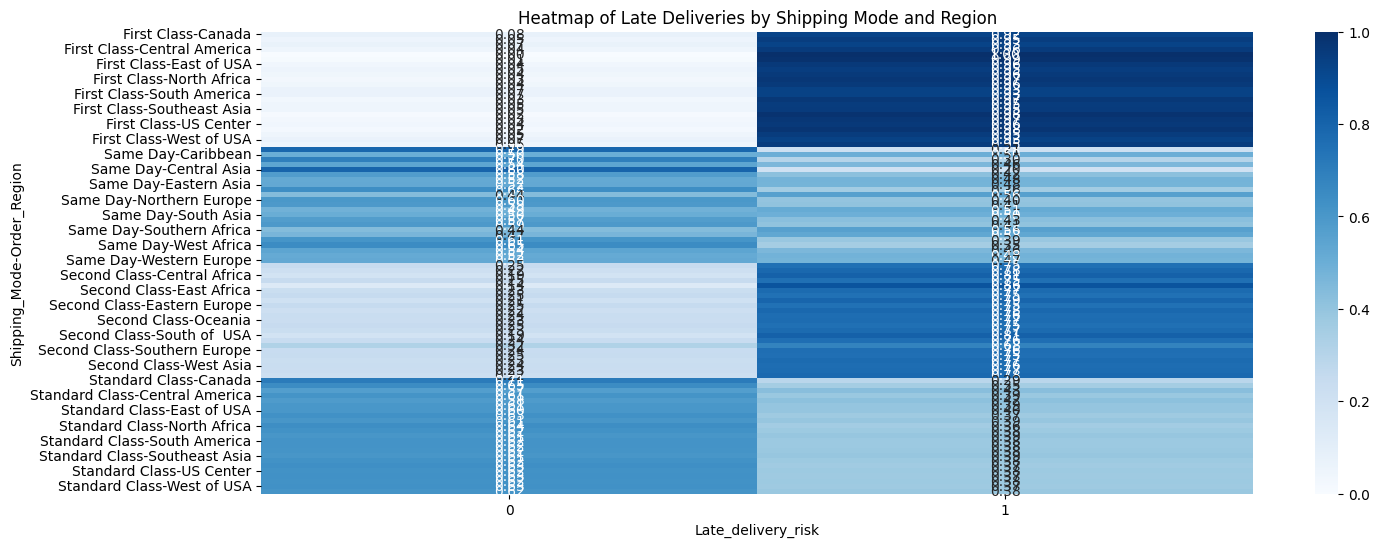

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

refined_df = both_contingency_table.div(both_contingency_table.sum(axis=1), axis=0)

plt.figure(figsize=(16,6))
sns.heatmap(refined_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Heatmap of Late Deliveries by Shipping Mode and Region")

The heatmap reveals that combination of First Class shipments and some regions (such as Canada, Central America) have a higher percentage of late deliveries compared to other combinations.